In [1]:
from src.data.image_transforms import *
import matplotlib.pyplot as plt
import numpy as np
from src.data.data_utils import *
from src.training.optimizer import get_optimizer
import torch
from src.plots.bounding_box import image_with_bounding_box
from src.models.retinanet.resnet import *
from src.training.trainer import Trainer
import warnings
from src.plots.history import plot_history
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
model = resnet152(3, True)
optimizer_config = {"optimizer_type": "adamw", "lr": 3e-6, "weight_decay": 1e-4}
optimizer = get_optimizer(model, optimizer_config)

adamw


In [3]:
runner = Trainer(data_dir="dataset",
                 model=model,
                 optimizer=optimizer,
                 saved_model_dir="saved_models",
                 train_data_transforms=get_train_transforms(),
                 val_data_transforms=get_val_transforms(),
                 batch_size=8,
                 inp_size=None,
                 load_from_disk=False)

In [4]:
runner.run_training_loop(3)

Epoch 1:
	Train Total Loss:2.0804
	Train Mean Average Precision: 0.0000

	Validation Total Loss:1.8659
	Validation Mean Average Precision: 0.0042
Epoch 2:
	Train Total Loss:1.7979
	Train Mean Average Precision: 0.0263

	Validation Total Loss:1.8518
	Validation Mean Average Precision: 0.0379
Epoch 3:
	Train Total Loss:1.6263
	Train Mean Average Precision: 0.0498

	Validation Total Loss:1.7028
	Validation Mean Average Precision: 0.0387


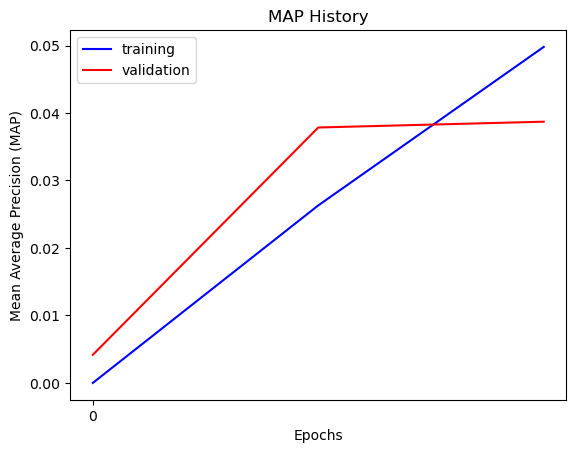

In [5]:
plot_history(runner.train_map_history,
             runner.validation_map_history,
             "Mean Average Precision (MAP)",
             "MAP History")